1. Dataset acquisition and cleaning

In [61]:
#here we are simply importing the necessary packages to run our ensemble methods

import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random

In [62]:
#reading in the cvd data so that we can begin our data quality analysis
cvd = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')

In [63]:
#Here we are showing the first five rows of our dataset to get an overview 
#of what we are working with.
cvd.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


In [64]:
#now we are going to perform a data quality analysis on our data to make sure
#it is ready for modelling

#looking at null values
print(cvd.isnull().sum())

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64


In [65]:
#looking at data type for columns
print(cvd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB
None


In [66]:
cvd.describe()
#data looks appropriate and ready to be trained and modelled

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


2. Setting Up Our Model


In [67]:
#First, we want to divide our data into our independent and dependent variables. 
#For this dataset, our y will be our cvd_4types and everything else are our 
#x variabless

y = cvd['cvd_4types']
x = cvd.drop('cvd_4types',axis=1)


In [68]:
#Now that we have created our x and y, we will make our train and test dataset.
#Our test dataset will be 20% of our model and will be chosen randomly

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,
                                                    random_state=99)

3. Determining Best Model Best On Penalty

In [69]:
#There are four trials of penalties we will be testing, L1, L2, elasticnet, 
#and no penalty 
#Here is the difference between L1 and L2 gotten from the internet: 

#"L1 regularization penalizes the sum of absolute values of the weights, whereas
 #L2 regularization penalizes the sum of squares of the weights"

 #Source: https://neptune.ai/blog/fighting-overfitting-with-l1-or-l2-regularization


#We will be testing out these models and seeing which model has the best sum of 
#the AUC and the accuracy score. This will tell us the best model and will then 
#allow us to make predictions and tell us the accuracy of the best model

#First is L1. Our goal here is to generate a dataframe telling us the best model 
#and its sum of AUC and accuracy

solvers=['liblinear','saga']
c_range=np.logspace(-2,2,20)
c_l1=[]
solver_l1=[]
accuracy=[]
auc=[]
index=[]

for c in c_range:
  for solver in solvers:

    #creating model 1 with our L1 penalty
    clf_1=linear_model.LogisticRegression(solver=solver,C=c,penalty='l1',
                                          random_state=99)
    model_1=clf_1.fit(x_train,y_train)

    #from our generated model 1, we will use our testing dataset to make 
    #predictions which will get us our accuracy and AUC
    y_pred=model_1.predict(x_test)
    y_pred_prob = clf_1.predict_proba(x_test)[:,1]


    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)

    #Now we generate accuracy and AUC to put into our dataframe
    accuracy.append(np.mean(y_test==y_pred))
    auc.append(metrics.auc(fpr, tpr))

    #appending c, solver, and index so that we can build our dataframe 
    c_l1.append(c)
    solver_l1.append(solver)
    index.append((c,solver))

#Now that we have our data we are going to make our dataframe 
l1_dataframe={'C':c_l1,'Solver':solver_l1,'Accuracy':accuracy,'AUC':auc}
l1_methods=pd.DataFrame(l1_dataframe,index=index)

#Lastly, we get the sum of our accuracy and AUC and print them to determine 
#what our best model is
l1_methods['Total']=l1_methods['Accuracy']+l1_methods['AUC']
print(l1_methods['Total'].sort_values(ascending=False)[:5])


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

(2.06913808111479, liblinear)      1.469955
(3.359818286283781, liblinear)     1.468580
(0.7847599703514611, liblinear)    1.468489
(1.2742749857031335, liblinear)    1.467876
(37.92690190732246, liblinear)     1.467753
Name: Total, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [70]:
#L1 Best Model: 
#(C=2.06913808111479, solver='liblinear')    
# Accuracy + AUC = 1.469955

In [71]:
#L2

solvers=['newton-cg', 'lbfgs', 'sag', 'saga']
c_range=np.logspace(-2,2,20)
c_l2=[]
solver_l2=[]
accuracy=[]
auc=[]
index=[]

for c in c_range:
  for solver in solvers:

    #creating model 2 with our L2 penalty
    clf_2=linear_model.LogisticRegression(solver=solver,C=c,penalty='l2',
                                          random_state=99)
    model_2=clf_2.fit(x_train,y_train)

    #from our generated model 2, we will use our testing dataset to make 
    #predictions which will get us our accuracy and AUC
    y_pred=model_2.predict(x_test)
    y_pred_prob = clf_2.predict_proba(x_test)[:,1]


    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)

    #Now we generate accuracy and AUC to put into our dataframe
    accuracy.append(np.mean(y_test==y_pred))
    auc.append(metrics.auc(fpr, tpr))

    #appending c, solver, and index so that we can build our dataframe 
    c_l2.append(c)
    solver_l2.append(solver)
    index.append((c,solver))

#Now that we have our data we are going to make our dataframe 
l2_dataframe={'C':c_l2,'Solver':solver_l2,'Accuracy':accuracy,'AUC':auc}
l2_methods=pd.DataFrame(l2_dataframe,index=index)

#Lastly, we get the sum of our accuracy and AUC and print them to determine 
#what our best model is
l2_methods['Total']=l2_methods['Accuracy']+l2_methods['AUC']
print(l2_methods['Total'].sort_values(ascending=False)[:5])


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to c

(0.06951927961775606, newton-cg)    1.474353
(0.11288378916846889, newton-cg)    1.473838
(0.18329807108324356, newton-cg)    1.472404
(0.29763514416313175, newton-cg)    1.472346
(0.04281332398719394, newton-cg)    1.470323
Name: Total, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [72]:
#Compiling Models So Far:

#L1 Best Model: 
#(C=2.06913808111479, solver='liblinear')    
# Accuracy + AUC = 1.469955

#L2 Best Model: 
#(C=0.06951927961775606, solver='newton-cg')    
# Accuracy + AUC = 1.474353

#L2 is best so far

In [73]:
#Elasticnet

#Only solver here is Saga

# We want a range of 0-1 (0.1, 0.2, 0.3, etc...) for the l1 ratio in our 
#LogisticRegression parameters.

#Thus, we will set up num_range

num_range = np.linspace(0,1,10)
c_range=np.logspace(-2,2,20)
c_elas=[]
solver_elas=[]
accuracy=[]
auc=[]
index=[]

for c in c_range:
  for num in num_range:

    #creating model 3 with our elasticnet penalty
    clf_3=linear_model.LogisticRegression(solver='saga',C=c,
                                          penalty='elasticnet',
                                          l1_ratio = num, random_state=99)
    model_3=clf_3.fit(x_train,y_train)

    #from our generated model 3, we will use our testing dataset to make 
    #predictions which will get us our accuracy and AUC
    y_pred=model_3.predict(x_test)
    y_pred_prob = clf_3.predict_proba(x_test)[:,1]


    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)

    #Now we generate accuracy and AUC to put into our dataframe
    accuracy.append(np.mean(y_test==y_pred))
    auc.append(metrics.auc(fpr, tpr))

    #appending c, solver, and index so that we can build our dataframe 
    c_elas.append(c)
    solver_elas.append(solver)
    index.append((c,solver))

#Now that we have our data we are going to make our dataframe 
elas_dataframe={'C':c_elas,'Solver':solver_elas,'Accuracy':accuracy,'AUC':auc}
elas_methods=pd.DataFrame(elas_dataframe,index=index)

#Lastly, we get the sum of our accuracy and AUC and print them to determine 
#what our best model is
elas_methods['Total']=elas_methods['Accuracy']+elas_methods['AUC']
print(elas_methods['Total'].sort_values(ascending=False)[:5])


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

(0.016237767391887217, saga)    1.417444
(0.06951927961775606, saga)     1.415933
(37.92690190732246, saga)       1.415620
(23.357214690901213, saga)      1.415620
(8.858667904100823, saga)       1.415620
Name: Total, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [74]:
#Compiling Models So Far:

#L1 Best Model: 
#(C=2.06913808111479, solver='liblinear')    
# Accuracy + AUC = 1.469955

#L2 Best Model: 
#(C=0.06951927961775606, solver='newton-cg')    
# Accuracy + AUC = 1.474353

#Elasticnet Best Model:
#(C=0.016237767391887217, solver='saga')    
# Accuracy + AUC = 1.417444

#L2 is best so far

In [75]:
#No Penalty

solvers=['newton-cg', 'lbfgs', 'sag', 'saga']

#No c_range needed
solver_none=[]
accuracy=[]
auc=[]
index=[]

for solver in solvers:

    #creating model 4 with no penalty
  clf_4=linear_model.LogisticRegression(solver=solver,penalty='none', 
                                        random_state=99)
  model_4=clf_4.fit(x_train,y_train)

  #from our generated model 4, we will use our testing dataset to make 
  #predictions which will get us our accuracy and AUC
  y_pred=model_4.predict(x_test)
  y_pred_prob = clf_4.predict_proba(x_test)[:,1]
  fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)

  #Now we generate accuracy and AUC to put into our dataframe
  accuracy.append(np.mean(y_test==y_pred))
  auc.append(metrics.auc(fpr, tpr))

  #appending slover_none and index 
  solver_none.append(solver)
  index.append(solver)

#Now that we have our data we are going to make our dataframe 
none_dataframe={'Solver':solver_none,'Accuracy':accuracy,'AUC':auc}
none_methods=pd.DataFrame(none_dataframe,index=index)

#Lastly, we get the sum of our accuracy and AUC and print them to determine 
#what our best model is
none_methods['Total']=none_methods['Accuracy']+none_methods['AUC']
print(none_methods['Total'].sort_values(ascending=False)[:5])


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


newton-cg    1.467801
lbfgs        1.453521
sag          1.430050
saga         1.415581
Name: Total, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [76]:
#Compiling Models So Far:

#L1 Best Model: 
#(C=2.06913808111479, solver='liblinear')    
# Accuracy + AUC = 1.469955

#L2 Best Model: 
#(C=0.06951927961775606, solver='newton-cg')    
# Accuracy + AUC = 1.474353

#Elasticnet Best Model:
#(C=0.016237767391887217, solver='saga')    
# Accuracy + AUC = 1.417444

#No Penalty Best Model:
#(solver='newton-cg')    
# Accuracy + AUC = 1.467801

#Official Rankings of our Models:

#1. L2 - 1.474353
#2. L1 - 1.469955
#3. No Penalty - 1.467801
#4. Elasticnet - 1.417444

#L2 is best

4. Feature Importance

In [77]:
#Now that we have our best model, we want to display our feature 
#importance in descending order. 

#From our testing we saw that the best model is: 
#(Penalty = 'l2', C=0.06951927961775606, solver='newton-cg')    

#Now we creatre our fit with these hyperparameters:
best_model = linear_model.LogisticRegression(random_state=99, penalty='l2', 
                                             C=0.06951927961775606, 
                                             solver='newton-cg')
best_model.fit(x_train/np.std(x_train,0),y_train)


LogisticRegression(C=0.06951927961775606, random_state=99, solver='newton-cg')

In [78]:
#Now we can sort the importance of our features:

feature_importance=pd.Series(best_model.coef_[0],index=x.columns)
feature_importance.sort_values(ascending=False)

waist           0.933269
educat          0.185978
parrptdiab      0.159777
bend25          0.078776
srhype          0.068868
tired25         0.068241
age_s1          0.026156
cgpkyr          0.009827
tea15          -0.056883
happy25        -0.077471
neck20         -0.117430
mstat          -0.138945
av_weight_kg   -0.202309
hlthlm25       -0.332310
race           -0.345640
hip            -0.481203
dtype: float64

In [79]:
#Here we are going to rank feature importance based on actual influence 
#(using absolute values)

official_ranked_feature_importance=pd.Series(abs(best_model.coef_[0]),index=x.columns)
official_ranked_feature_importance.sort_values(ascending=False)

waist           0.933269
hip             0.481203
race            0.345640
hlthlm25        0.332310
av_weight_kg    0.202309
educat          0.185978
parrptdiab      0.159777
mstat           0.138945
neck20          0.117430
bend25          0.078776
happy25         0.077471
srhype          0.068868
tired25         0.068241
tea15           0.056883
age_s1          0.026156
cgpkyr          0.009827
dtype: float64

In [80]:
#Our features are sorted in order of decreasing influence on the CVD risk 
#This means that waist size has the biggest impact on the chances of getting
#Cardiovascualr disease. Our data shows us that an increase in waist size by 
#one unit increases the chance of cardiovascular disease by 0.93
#When looking at the feature importance, we look at the absolute value to rank 
#them based on importance as we did above

5. Evaluating Our Final Prediction

In [81]:
#Now we make our prediction with our test data
y_pred=best_model.predict(x_test)

#Below is our confusion matrix printed our based on number of True Negatives, 
#True Positives, False Negatives, and False Positives

confusion_matrix_cvd=sklearn.metrics.confusion_matrix(y_test, y_pred, 
                                                         labels=None, 
                                                         sample_weight=None, 
                                                         normalize=None)

print(confusion_matrix_cvd)

[[  1 269]
 [  0 379]]


In [82]:
#Now we are labelling our values in our confusoon matrix 
TN, FP, FN, TP = confusion_matrix_cvd.ravel()

In [83]:
#Precision and Recall
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print('Precision = ',precision,' , Recall = ',recall)

Precision =  0.5848765432098766  , Recall =  1.0


In [84]:
#f1 score

f1_sk=sklearn.metrics.f1_score(y_test, y_pred,average='binary')
f1_calculated=2*precision*recall/(precision+recall)
print('sklearn f1 score = ',f1_sk)
print('calculated f1 score = ',f1_calculated)


sklearn f1 score =  0.7380720545277508
calculated f1 score =  0.7380720545277508


In [85]:
#Next we'll print our accuracy and AUC for our model:


accuracy_chosen=accuracy_score(y_test, y_pred)
print('Accuracy = ',accuracy_chosen)

y_pred_prob = best_model.predict_proba(x_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
print('AUC = ',roc_auc)


Accuracy =  0.5855161787365177
AUC =  0.6766686211277241


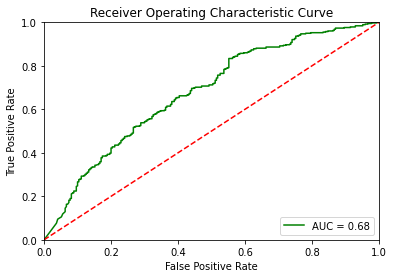

In [86]:
#ROC

#title
plt.title('Receiver Operating Characteristic Curve')

#setting values foru our plot
plt.plot(fpr, tpr, 'green', label = 'AUC = %0.2f' % roc_auc)

#legend for plot
plt.legend(loc = 'lower right')

#size of plot
plt.plot([0, 1], [0, 1],'r--')

#x length limit
plt.xlim([0, 1])

#y length limit
plt.ylim([0, 1])

#labelling x and y 
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#prints the graph
plt.show()

In [87]:
#Our final graph shows our ROC curve and shows the balance between sensitivity 
#and specificity. Our precision is our ability to predict our positive outcomes 
#correctly and our recall is our ability to predict our negative outcomes 
#correctly. As we can see, our recall is 1 which means we predict our negative 
#outcomes perfectly. However, our precision is 0.584 which means our positive 
#predictions is only slightly better than random.  This is shown in our ROC 
#curve with our AUC only being 0.68 which is not great as well. When thinking 
#about our data and what we are working with, we are trying to predict 
#cardiovascular disease in patients. We have a 100% chance of telling someone 
#if they do not have cardiovascular disease which is great. However, we only 
#have a 58.4% of correctly predicting when someone has cardiovascular disease. 
#Thus, in my opinion, this is not a very good model and shouldn’t be used to 
#help predict cardiovascular disease. 